IDEAS:

 - Eastern and Western Poison Ivy Datasets
  > Let's first try training 1 model on a combined dataset. If model prediction values are poor, or model success rates on external test data is poor, we will retrain the model on 1 of the 2, and test again. 
  > https://www.kaggle.com/datasets/hanselliott/toxic-plant-classification
 - Yes/No or This/That classifier?
  > "Toxic Plant Classification" on Kaggle uses the "this/that" approach, where the plant is either THIS or THAT. The project trains m

# Import Libraries

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import PIL
import cv2
import matplotlib.pyplot as plt

In [2]:
print("TF v:", tf.__version__)

TF v: 2.12.0


# Import Images

## Check Image Quality

Eastern Poison Ivy, IMG 000


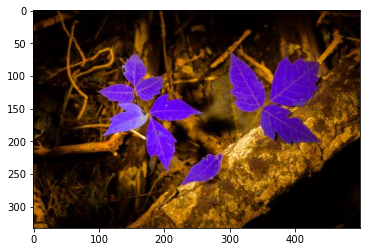

In [3]:
img_test = cv2.imread('data/002/000.jpg')
plt.imshow(img_test)
print('Eastern Poison Ivy, IMG 000')

## Load and preprocess images 

In [37]:
# Loading Eastern and Western variants into individual classes
dir = 'data/' 

# Creating training set
train_pi = tf.keras.utils.image_dataset_from_directory(
  dir,
  validation_split=0.2,
  subset='training',
  seed=123,
  image_size=(399, 399),
  batch_size=32)

# Creating test set
val_pi = tf.keras.utils.image_dataset_from_directory(
  dir,
  validation_split=0.2,
  subset='validation',
  seed=123,
  image_size=(399, 399),
  batch_size=32)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.
Found 2000 files belonging to 2 classes.
Using 400 files for validation.


## View Images

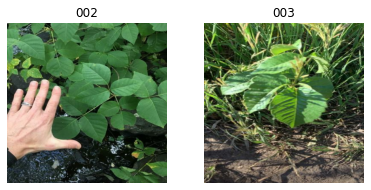

In [8]:
class_names = train_pi.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_pi.take(1):
  for i in range(2):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## Build and Compile Model

In [38]:
num_classes = 5

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

## Fit the model

In [39]:
model.fit(train_pi, validation_data=val_pi, epochs=3)

Epoch 1/3
50/50 [==============================] - 77s 2s/step - loss: 1.2508 - accuracy: 0.4994 - val_loss: 0.6906 - val_accuracy: 0.5400
Epoch 2/3
50/50 [==============================] - 76s 2s/step - loss: 0.7035 - accuracy: 0.5350 - val_loss: 0.7018 - val_accuracy: 0.5750
Epoch 3/3
50/50 [==============================] - 76s 2s/step - loss: 0.6712 - accuracy: 0.5738 - val_loss: 0.7106 - val_accuracy: 0.4950


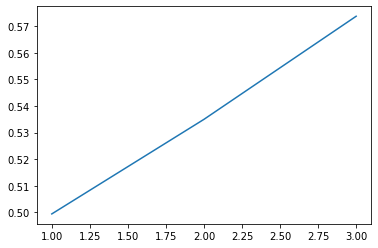

In [40]:
plt.plot([1, 2, 3], [0.4994, 0.5350, 0.5738])

In [41]:
model.evaluate(val_pi)

13/13 [==============================] - 3s 243ms/step - loss: 0.7106 - accuracy: 0.4950


[0.7106017470359802, 0.4950000047683716]

In [42]:
model.fit(train_pi, validation_data=val_pi, epochs=3, shuffle=True)

Epoch 1/3
50/50 [==============================] - 76s 2s/step - loss: 0.6198 - accuracy: 0.6569 - val_loss: 0.6731 - val_accuracy: 0.5800
Epoch 2/3
50/50 [==============================] - 77s 2s/step - loss: 0.4810 - accuracy: 0.7619 - val_loss: 0.7257 - val_accuracy: 0.5675
Epoch 3/3
50/50 [==============================] - 77s 2s/step - loss: 0.3041 - accuracy: 0.8712 - val_loss: 0.7803 - val_accuracy: 0.5550
